### Case Study

About Dataset
Brazilian E-Commerce Public Dataset by Olist
Welcome! This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Join it With the Marketing Funnel by Olist
We have also released a Marketing Funnel Dataset. You may join both datasets and see an order from Marketing perspective now!

Instructions on joining are available on this Kernel.

Context
This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

Attention
An order might have multiple items.
Each item might be fulfilled by a distinct seller.
All text identifying stores and partners where replaced by the names of Game of Thrones great houses.
Example of a product listing on a marketplace
Example of a product listing on a marketplace

Data Schema
The data is divided in multiple datasets for better understanding and organization. Please refer to the following data schema when working with it:
Data Schema

Classified Dataset
We had previously released a classified dataset, but we removed it at Version 6. We intend to release it again as a new dataset with a new data schema. While we don't finish it, you may use the classified dataset available at the Version 5 or previous.

Inspiration
Here are some inspiration for possible outcomes from this dataset.

NLP:
This dataset offers a supreme environment to parse out the reviews text through its multiple dimensions.

Clustering:
Some customers didn't write a review. But why are they happy or mad?

Sales Prediction:
With purchase date information you'll be able to predict future sales.

Delivery Performance:
You will also be able to work through delivery performance and find ways to optimize delivery times.

Product Quality:
Enjoy yourself discovering the products categories that are more prone to customer insatisfaction.

Feature Engineering:
Create features from this rich dataset or attach some external public information to it.

Acknowledgements
Thanks to Olist for releasing this dataset

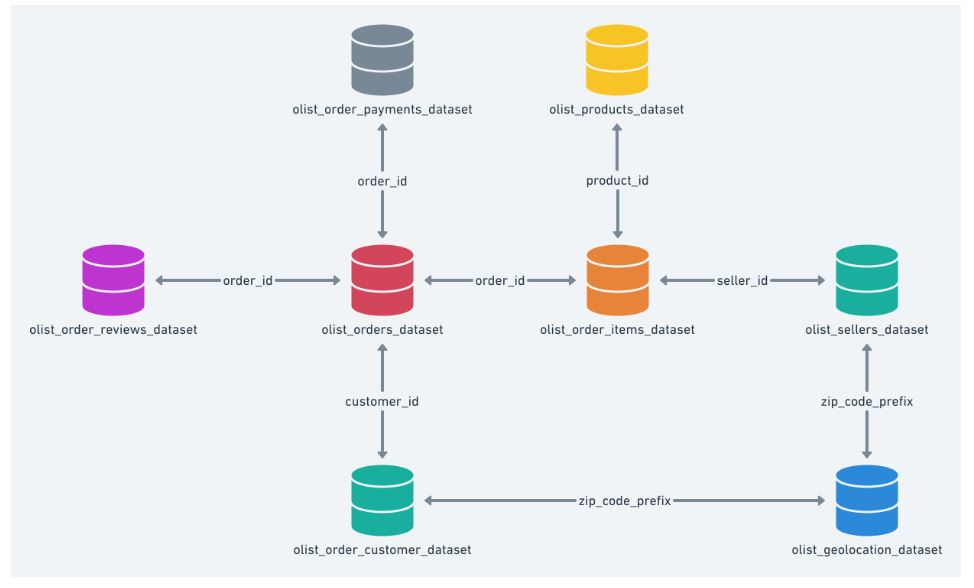

In [3]:
from IPython import display
display.Image("Capture.jpg")

<b>Importing the modules</b>

In [10]:
import pandas as pd
import numpy as np

import squarify
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

<b>Loading the data</b>

In [20]:
orders = pd.read_csv('olist_orders_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')

In [21]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


In [22]:
print(orders.shape)

(99441, 8)


In [23]:
payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [24]:
print(payments.shape)

(103886, 5)


In [25]:
customer.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


In [26]:
customer_2.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


<b>EDA and Data Wrangling</b>

In [27]:
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date']) # datetime conversion
payments = payments.set_index('order_id') # preparation before the join
orders = orders.set_index('order_id') # preparation before the join

joined = orders.join(payments) # join on order_id

In [28]:
joined.isna()\
      .sum()\
      .sort_values(ascending=False)

order_delivered_customer_date    3132
order_delivered_carrier_date     1888
order_approved_at                 175
payment_value                       1
payment_installments                1
payment_type                        1
payment_sequential                  1
order_estimated_delivery_date       0
order_purchase_timestamp            0
order_status                        0
customer_id                         0
dtype: int64

In [29]:
joined.nunique()\
      .sort_values(ascending=False)

customer_id                      99441
order_purchase_timestamp         98875
order_delivered_customer_date    95664
order_approved_at                90733
order_delivered_carrier_date     81018
payment_value                    29077
order_estimated_delivery_date      459
payment_sequential                  29
payment_installments                24
order_status                         8
payment_type                         5
dtype: int64

In [31]:
last_date = joined['order_delivered_carrier_date'].max() + pd.to_timedelta(1, 'D')

RFM = joined.dropna(subset=['order_delivered_carrier_date'])\
            .reset_index()\
            .groupby('customer_id')\
            .agg(Recency = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days ),
                 Frequency = ('order_id', 'size'),
                 Monetary = ('payment_value', 'sum'))

In [33]:
RFM.isna().sum()

Recency      0
Frequency    0
Monetary     0
dtype: int64

In [32]:
RFM.describe([0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Recency,97658.0,250.511847,152.674579,1.0,21.00,35.00,54.00,127.00,231.00,361.00,478.00,532.000,587.0000,704.00
Frequency,97658.0,1.044451,0.378736,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.000,2.0000,29.00
Monetary,97658.0,159.824647,218.553380,0.0,22.38,32.38,39.59,61.93,105.28,176.26,305.77,446.558,1048.6658,13664.08


<b>Recency/Monetary/Frequency Clac</b>

In [49]:
RFM.head()

,Recency,Frequency,Monetary,R_score,M_score,F_score,RFM_score,segments
customer_id,,,,,,,,
00012a2ce6f8dcda20d059ce98491703,299,1,114.74,2,2,1,212,Regular
000161a058600d5901f007fab4c27140,420,1,67.41,3,1,1,311,Gone
0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,3,3,1,313,Gone
0002414f95344307404f0ace7a26f1d5,389,1,179.35,3,3,1,313,Gone
000379cdec625522490c315e70c7a9fb,161,1,107.01,1,2,1,112,Rookies


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


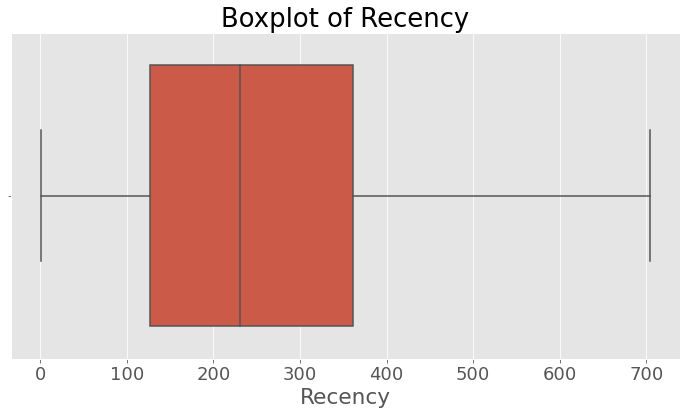

In [50]:


plt.figure(figsize=(12, 6))
sns.boxplot(x='Recency', data=RFM)
plt.title('Boxplot of Recency');



In [51]:
RFM['Frequency'].value_counts(normalize=True)*100

1    97.141716
2     2.380284
3     0.309674
4     0.113295
5     0.055029
Name: Frequency, dtype: float64

In [52]:
RFM['Frequency'].apply(lambda x: 'less or equal to 5' if x<=5 else 'greater than 5').value_counts(normalize=True) * 100

less or equal to 5    100.0
Name: Frequency, dtype: float64

In [53]:
RFM = RFM[RFM['Frequency'] <= 5]

In [54]:
RFM['Monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    92678.000000
mean       123.297382
std         85.296909
min          0.000000
25%         59.960000
50%         99.900000
75%        162.857500
90%        241.150000
95%        310.110000
99%        405.030000
max        446.940000
Name: Monetary, dtype: float64

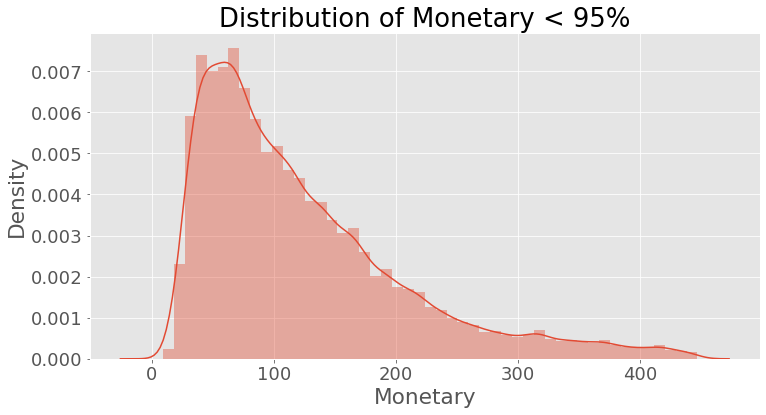

In [55]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(RFM[RFM['Monetary']<447].Monetary);

In [56]:
RFM = RFM[RFM['Monetary'] < 447]

<b>RFM GROUP</b>

In [57]:
RFM['R_score'] = pd.qcut(RFM['Recency'], 3, labels=[1, 2, 3]).astype(str)
RFM['M_score'] = pd.qcut(RFM['Monetary'], 3, labels=[1, 2, 3]).astype(str)
RFM['F_score'] = RFM['Frequency'].apply(lambda x: '1' if x==1 else '2')

RFM['RFM_score'] = RFM['R_score'] + RFM['F_score'] + RFM['M_score']



    CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients
    GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;
    ROOKIE - '111', '112', '113' - just have joined - new clients that have joined recently
    WHALES - '323', '213', '223 - most revenue generating - whales that generate revenue
    LOYAL - '221', '222', '321', '322' - loyal users
    REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out



In [58]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookies'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'
    


RFM['segments'] = RFM['RFM_score'].apply(segment)
RFM['segments'].value_counts(normalize=True)*100

Rookies    32.547099
Gone       32.028097
Regular    22.199443
Whales     11.516217
Loyal       1.440471
Core        0.268672
Name: segments, dtype: float64

In [59]:
segmentwise = RFM.groupby('segments').agg(RecencyMean = ('Recency', 'mean'),
                                          FrequencyMean = ('Frequency', 'mean'),
                                          MonetaryMean = ('Monetary', 'mean'),
                                          GroupSize = ('Recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Core,86.939759,2.220884,221.581847,249
Gone,431.335613,1.000000,122.264921,29683
Loyal,345.632210,2.262921,73.224195,1335
Regular,229.625061,1.031302,74.299787,20574
Rookies,88.471058,1.000000,124.585984,30164
Whales,238.460695,1.062307,220.948326,10673


### Viz

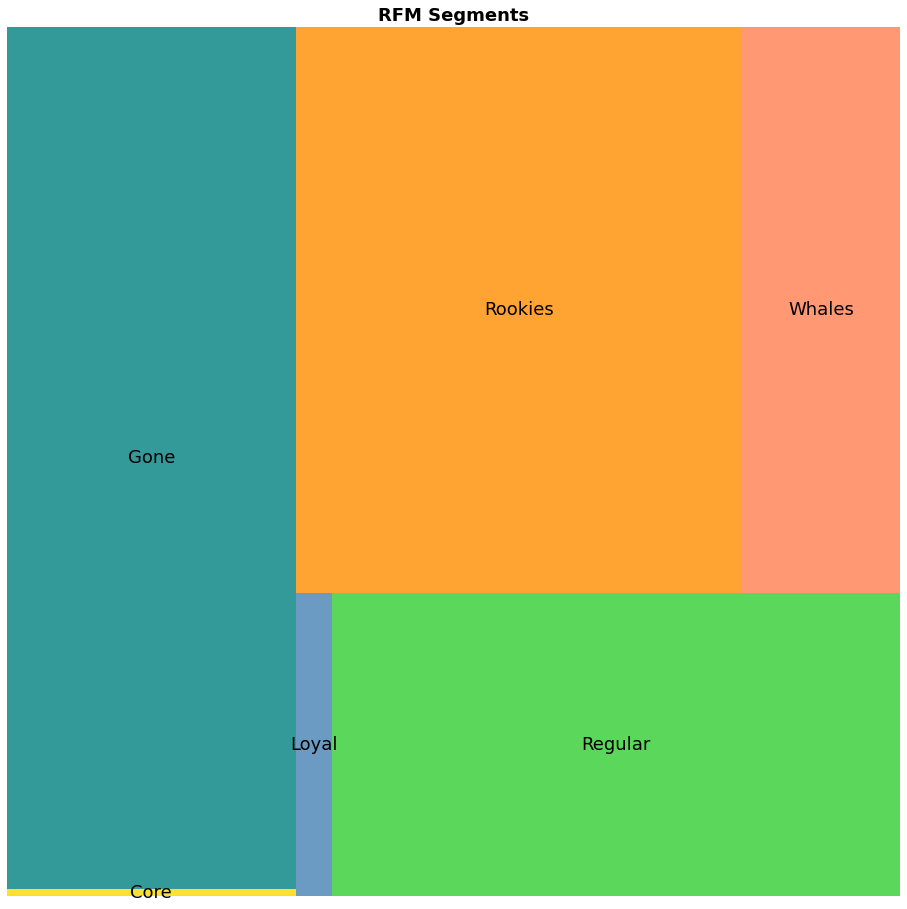

In [60]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)


fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()